In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pd.read_csv("Titanic-Dataset.csv")

# instapct te data

In [2]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Amount of rows and columns

In [3]:
print(f'Total rows: {data.shape[0]}, Total columns: {data.shape[1]}')

Total rows: 891, Total columns: 12


# Column overview

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Amount of empty value's in the dataset

In [5]:
data.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

# Histogram of the age

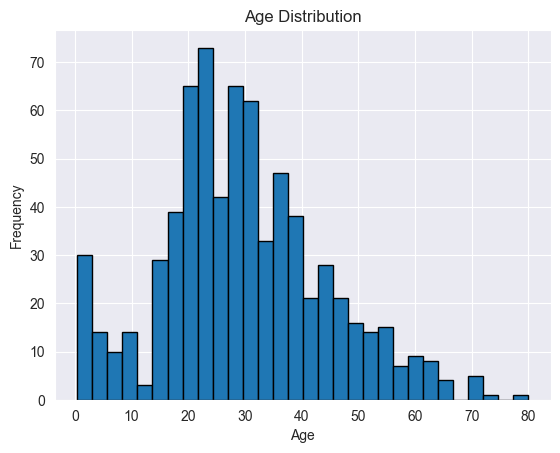

In [6]:
plt.hist(data['Age'].dropna(), bins=30, edgecolor='black')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Correlation between data + encode data to numerical

In [7]:
def factorize_columns(data, columns_to_factorize):
    encoded_mappings = {}

    for column in columns_to_factorize:
        codes, unique_values = pd.factorize(data[column])
        data[column] = codes
        encoded_mappings[column] = {column: unique_values}

    return data, encoded_mappings

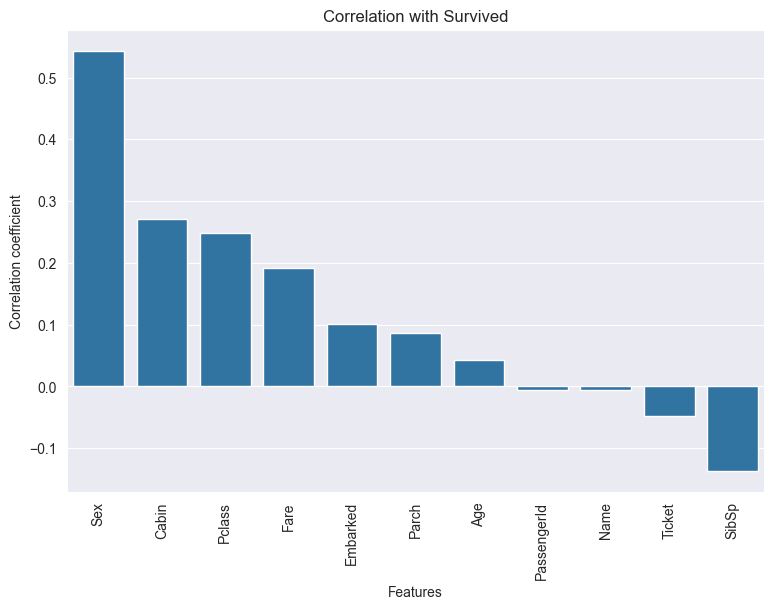

In [8]:
factorized, x = factorize_columns(data, data.columns.tolist())

corr = factorized.corr()

# Get correlations with 'Survived', and drop the 'Survived' correlation itself
correlation_with_survived = corr['Survived'].drop('Survived').sort_values(ascending=False)

plt.figure(figsize=(9,6))
sns.barplot(x = correlation_with_survived.index, y = correlation_with_survived.values)
plt.title('Correlation with Survived')
plt.xlabel('Features')
plt.ylabel('Correlation coefficient')
plt.xticks(rotation=90)
plt.show()

In the correlation graph is there a strong correlation between the survival rate and the Sex, an a minor but noticeable correlation with the Pclass.

In [9]:
data.drop(['Name', 'PassengerId', 'Cabin'], axis=1, inplace=True)

# handle missing data

In [10]:

def replace_undefined_with_mode(data, column_name):
    if column_name in data.columns:
        mode_value = data[column_name].mode()[0]  # Get the mode (most frequent value)
        # Replace "NaN" values with the mode
        data[column_name] = data[column_name].replace(np.nan, mode_value)
    else:
        print(f"The column '{column_name}' does not exist in the DataFrame.")
    return data

In [11]:
data, mappings = factorize_columns(data, data.columns)
for col in data.columns:
    data = replace_undefined_with_mode(data, col)
    

In [12]:
data.isna().sum().sort_values(ascending=False)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [13]:
labels = data['Survived']
dataframe = data.drop(['Survived'], axis=1)
train_data, test_data, train_labels, test_labels = train_test_split(dataframe, labels, test_size=0.2, random_state=1)

# cleaning and normalizing

In [14]:

data.drop(['Parch', 'SibSp', 'Ticket', 'Fare'], axis=1, inplace=True)

data, mappings = factorize_columns(data, data.columns)
for col in data.columns:
    data = replace_undefined_with_mode(data, col)
    
data.isna().sum().sort_values(ascending=False)
    

Survived    0
Pclass      0
Sex         0
Age         0
Embarked    0
dtype: int64

In [15]:
def lenear_regression(df):
    # df = data.drop(['Parch', 'SibSp', 'Ticket', 'Fare'], axis=1)
    
    y = df[['Survived']]
    X = df.drop(['Survived'],axis=1)
    
    
    Xtrain, Xrest, ytrain, yrest = train_test_split(X, y, test_size=0.5)
    
    lr = LinearRegression()
    lr.fit(Xtrain, ytrain)

    return lr

In [16]:
from tensorflow.keras import layers
import keras

def deep_model(data_deep_model, num_epochs=50):
    labels = data_deep_model['Survived']
    dataframe = data_deep_model.drop(['Survived'], axis=1)
    train_data, test_data, train_labels, test_labels = train_test_split(dataframe, labels, test_size=0.2, random_state=1)
    input = layers.Input(shape=(4, 1, 1))
    layer_build = layers.Flatten()(input)
    layer_build = layers.Dense(57, activation='relu')(layer_build)
    layer_build = layers.Dense(57, activation='relu')(layer_build)
    output = layers.Dense(1, activation='sigmoid')(layer_build)
    model = keras.Model(inputs=input, outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy')
    model.fit(train_data, train_labels, epochs=num_epochs)
    model.summary()
    
    return model

In [17]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

model = deep_model(data)

test_data = test_data.drop(['Parch', 'SibSp', 'Ticket', 'Fare'], axis=1)
    
# Predict the results using the test dataset
predictions = model.predict(test_data)

# Round the predictions to get the final output classes
rounded_predictions = [round(x[0]) for x in predictions]

# Calculate Accuracy
accuracy = accuracy_score(test_labels, rounded_predictions)
print(f'NN Accuracy: {accuracy}')

# Calculate Recall
recall = recall_score(test_labels, rounded_predictions)
print(f'NN Recall: {recall}')

# Calculate Precision
precision = precision_score(test_labels, rounded_predictions)
print(f'NN Precision: {precision}')

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, rounded_predictions)
print(f'NN Confusion Matrix: \n{conf_matrix}')

Epoch 1/50
23/23 [==============================] - 0s 793us/step - loss: 0.6716
Epoch 2/50
23/23 [==============================] - 0s 659us/step - loss: 0.6398
Epoch 3/50
23/23 [==============================] - 0s 615us/step - loss: 0.6210
Epoch 4/50
23/23 [==============================] - 0s 604us/step - loss: 0.5977
Epoch 5/50
23/23 [==============================] - 0s 586us/step - loss: 0.5765
Epoch 6/50
23/23 [==============================] - 0s 537us/step - loss: 0.5332
Epoch 7/50
23/23 [==============================] - 0s 567us/step - loss: 0.5254
Epoch 8/50
23/23 [==============================] - 0s 521us/step - loss: 0.5072
Epoch 9/50
23/23 [==============================] - 0s 544us/step - loss: 0.4946
Epoch 10/50
23/23 [==============================] - 0s 567us/step - loss: 0.4863
Epoch 11/50
23/23 [==============================] - 0s 590us/step - loss: 0.4979
Epoch 12/50
23/23 [==============================] - 0s 567us/step - loss: 0.5050
Epoch 13/50
23/23 [======

True Positives (TP): Your model correctly predicted 39 survivors.
True Negatives (TN): Your model correctly predicted 98 non-survivors.
False Positives (FP): Your model incorrectly predicted 8 survivors.
False Negatives (FN): Your model incorrectly predicted 34 non-survivors.

In [18]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

model = lenear_regression(data)

# Predict the results using the test dataset
predictions = model.predict(test_data)

# Round the predictions to get the final output classes
rounded_predictions = [round(x[0]) for x in predictions]

# Calculate Accuracy
accuracy = accuracy_score(test_labels, rounded_predictions)
print(f'LR Accuracy: {accuracy}')

# Calculate Recall
recall = recall_score(test_labels, rounded_predictions)
print(f'LR Recall: {recall}')

# Calculate Precision
precision = precision_score(test_labels, rounded_predictions)
print(f'LR Precision: {precision}')

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, rounded_predictions)
print(f'LR Confusion Matrix: \n{conf_matrix}')

LR Accuracy: 0.776536312849162
LR Recall: 0.6712328767123288
LR Precision: 0.7538461538461538
LR Confusion Matrix: 
[[90 16]
 [24 49]]


True Positives (TP): Your model correctly predicted 49 survivors.
True Negatives (TN): Your model correctly predicted 90 non-survivors.
False Positives (FP): Your model incorrectly predicted 16 survivors.
False Negatives (FN): Your model incorrectly predicted 24 non-survivors.

# Conclusion

Accuracy: The linear regression has a higher accuracy (77.7%) compared to the NN (76.5%).

Recall: The linear regression has a significantly higher recall score (67.1%) compared to the previous model (53.4%). This means it is more able to correctly identify survivors.

Precision: The NN has a higher precision (82.9%) compared to the linear regression (75.4%). This means the NN, when predicting a passenger survived, is right more often.

Confusion Matrix: The linear regression has more true positives (49 vs 39) and true negatives (90 vs 98), but also more false positives (16 vs 8). NN has fewer false negatives (24 vs 34), which is good.

In conclusion, considering all metrics, the LR model generally shows a better performance.